In [1]:
!pip install segmentation_models_pytorch
!pip install wandb
!pip install torcheval
!pip install torchmetrics

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 17.6 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=555e21075efbc1eadd62dce7493498efdfb023b736536a814d1bdc161d6a399b
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=1af23f213c2d69ec1c7f01c6b93bef46866dffd94855b29fd7b6c701541abe7e
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c601

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Iniatial

In [2]:
!mkdir Master
!mkdir /content/Master/instances
!mkdir /content/Master/Output

# !wget -P Master http://images.cocodataset.org/zips/val2017.zip
!wget -P Master http://images.cocodataset.org/annotations/panoptic_annotations_trainval2017.zip
!wget -P /content/Master/instances http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget -P Master http://images.cocodataset.org/zips/train2017.zip

--2024-08-31 07:22:40--  http://images.cocodataset.org/annotations/panoptic_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.80.76, 52.217.135.201, 3.5.29.228, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.80.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 860725834 (821M) [application/zip]
Saving to: ‘Master/panoptic_annotations_trainval2017.zip’

panoptic_annotation 100%[===================>] 820.85M  32.3MB/s    in 26s     

2024-08-31 07:23:06 (31.5 MB/s) - ‘Master/panoptic_annotations_trainval2017.zip’ saved [860725834/860725834]

--2024-08-31 07:23:06--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.0.236, 3.5.12.57, 52.217.205.97, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.0.236|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907

In [4]:
# !mkdir Master
# !mkdir /content/Master/instances
# !mkdir /content/Master/Output

!mkdir model_checkpoints
!mkdir backgrounds

In [3]:
!unzip /content/Master/panoptic_annotations_trainval2017.zip -d Master
!unzip /content/Master/instances/annotations_trainval2017.zip -d /content/Master/instances
!unzip /content/Master/train2017.zip -d Master

Streaming output truncated to the last 5000 lines.
 extracting: Master/train2017/000000259556.jpg  
 extracting: Master/train2017/000000381931.jpg  
 extracting: Master/train2017/000000569592.jpg  
 extracting: Master/train2017/000000229396.jpg  
 extracting: Master/train2017/000000488990.jpg  
 extracting: Master/train2017/000000348684.jpg  
 extracting: Master/train2017/000000234031.jpg  
 extracting: Master/train2017/000000563584.jpg  
 extracting: Master/train2017/000000276069.jpg  
 extracting: Master/train2017/000000401194.jpg  
 extracting: Master/train2017/000000502089.jpg  
 extracting: Master/train2017/000000192183.jpg  
 extracting: Master/train2017/000000425127.jpg  
 extracting: Master/train2017/000000126766.jpg  
 extracting: Master/train2017/000000324161.jpg  
 extracting: Master/train2017/000000452746.jpg  
 extracting: Master/train2017/000000423782.jpg  
 extracting: Master/train2017/000000546343.jpg  
 extracting: Master/train2017/000000249290.jpg  
 extracting: Maste

In [ ]:
# !unzip /content/Master/val2017.zip -d Master
!unzip /content/drive/MyDrive/panoptic_annotations_trainval2017.zip -d Master
!unzip /content/drive/MyDrive/annotations_trainval2017.zip -d /content/Master/instances
!unzip /content/drive/MyDrive/train2017.zip -d Master

Streaming output truncated to the last 5000 lines.
 extracting: Master/train2017/000000259556.jpg  
 extracting: Master/train2017/000000381931.jpg  
 extracting: Master/train2017/000000569592.jpg  
 extracting: Master/train2017/000000229396.jpg  
 extracting: Master/train2017/000000488990.jpg  
 extracting: Master/train2017/000000348684.jpg  
 extracting: Master/train2017/000000234031.jpg  
 extracting: Master/train2017/000000563584.jpg  
 extracting: Master/train2017/000000276069.jpg  
 extracting: Master/train2017/000000401194.jpg  
 extracting: Master/train2017/000000502089.jpg  
 extracting: Master/train2017/000000192183.jpg  
 extracting: Master/train2017/000000425127.jpg  
 extracting: Master/train2017/000000126766.jpg  
 extracting: Master/train2017/000000324161.jpg  
 extracting: Master/train2017/000000452746.jpg  
 extracting: Master/train2017/000000423782.jpg  
 extracting: Master/train2017/000000546343.jpg  
 extracting: Master/train2017/000000249290.jpg  
 extracting: Maste

In [4]:
# !unzip /content/Master/annotations/panoptic_val2017.zip -d Master
# !mv /content/Master/annotations/panoptic_val2017.json /content/Master # move src dest
# !mv /content/Master/instances/annotations/instances_val2017.json /content/Master # move src dest
# # !unzip /content/Master/panoptic_annotations_trainval2017.zip -d Master

!rm -r /content/Master/panoptic_annotations_trainval2017.zip
!rm -r /content/Master/train2017.zip

!unzip /content/Master/annotations/panoptic_train2017.zip -d Master
!mv /content/Master/annotations/panoptic_train2017.json /content/Master # move src dest
!mv /content/Master/instances/annotations/instances_train2017.json /content/Master # move src dest
# !unzip /content/Master/panoptic_annotations_trainval2017.zip -d Master

Streaming output truncated to the last 5000 lines.
  inflating: Master/panoptic_train2017/000000152038.png  
  inflating: Master/panoptic_train2017/000000008336.png  
  inflating: Master/panoptic_train2017/000000279563.png  
  inflating: Master/panoptic_train2017/000000188522.png  
  inflating: Master/panoptic_train2017/000000473573.png  
  inflating: Master/panoptic_train2017/000000531032.png  
  inflating: Master/panoptic_train2017/000000267985.png  
  inflating: Master/panoptic_train2017/000000334311.png  
  inflating: Master/panoptic_train2017/000000187611.png  
  inflating: Master/panoptic_train2017/000000011667.png  
  inflating: Master/panoptic_train2017/000000497187.png  
  inflating: Master/panoptic_train2017/000000218189.png  
  inflating: Master/panoptic_train2017/000000030871.png  
  inflating: Master/panoptic_train2017/000000266443.png  
  inflating: Master/panoptic_train2017/000000567274.png  
  inflating: Master/panoptic_train2017/000000521221.png  
  inflating: Master/p

In [5]:
!rm -r /content/Master/val2017.zip
# !rm -r /content/Master/panoptic_annotations_trainval2017.zip
# !rm -r /content/Master/train2017.zip

import shutil

shutil.rmtree('/content/Master/annotations', ignore_errors=True)
shutil.rmtree('/content/Master/instances', ignore_errors=True)
shutil.rmtree('/content/Master/__MACOSX', ignore_errors=True)

rm: cannot remove '/content/Master/val2017.zip': No such file or directory


In [ ]:
# import shutil

# shutil.rmtree('/content/Proiect-Dizertatie', ignore_errors=True)
# shutil.rmtree('/content/Master/instances', ignore_errors=True)

In [12]:
import os

def list_folder_structure(folder_path, indent_level=0):
    # Iterate through the items in the folder
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        # Print with indentations for visual hierarchy
        print(" " * indent_level + "|-- " + item)
        # If the item is a directory, recursively list its contents
        if os.path.isdir(item_path):
            list_folder_structure(item_path, indent_level + 4)  # Increase indentation level

# Set the path to the folder you want to view
folder_path = '/content/Master/Output'

list_folder_structure(folder_path)


In [9]:
len('/content/Master/Output')
len('/content/Master/panoptic_train2017')
len('/content/Master/train2017')

25

# Libraries

In [1]:
# For managing COCO dataset
from pycocotools.coco import COCO

# For creating and managing folder/ files
import glob
import os
import shutil

# For managing images
from PIL import Image
import skimage.io as io

# Basic libraries
import numpy as np
import pandas as pd
import random
import cv2

# For plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import wandb

# For importing models and working with them
## Torch
import torch
import torch.utils.data # for Dataset
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
import segmentation_models_pytorch as smp

## Torchvision
import torchvision
from torchvision.transforms import transforms

# For creating train - test splits
from sklearn.model_selection import train_test_split

import pathlib
import pylab
import requests
from io import BytesIO
from pprint import pprint
from tqdm import tqdm
import time
from imutils import paths

# Performance Metrics
from sklearn.metrics import multilabel_confusion_matrix

# Correlation and Clustering
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN
from collections import defaultdict
from skimage.metrics import structural_similarity as ssim


# Import Files
import BinaryMasks as bm
import CalcMetrics as cm
import CreateDataset as crd
import FilterImgs as flt
import TrainModel as trModel
import ValidateModel as valModel
import TestModel as testModel
import SaveCSV
import DiceLoss as dcloss
import EarlyStopping as stopping
import PlotResults as pr
import MainLoop as main
import DisplayMetrics as dm
import ImageCorrelation as ic


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


# %matplotlib inline

cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu


# Configuration

In [2]:
data = 'train2017'

# Data and Masks
IMAGE_PATH = os.path.join('/content/Master/', data)
MASK_PATH = os.path.join('/content/Master/', 'panoptic_' + data)

# define the path to the base output directory
BASE_OUTPUT = '/content/Master/Output'

# define the path to the output serialized model, model training plot, and testing image paths
MODEL_PATH = os.path.join(BASE_OUTPUT, "unet_tgs_salt.pth")
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
TEST_PATHS = os.path.sep.join([BASE_OUTPUT, "test_paths.txt"])



# determine if we will be pinning memory during data loading
PIN_MEMORY = True if device == "cuda" else False


# define the number of channels in the input, number of classes, and number of levels in the U-Net model
# NUM_CHANNELS = 3
# NUM_CLASSES = 2 # person vs Background

# define the input image dimensions
INPUT_IMAGE_WIDTH = 256
INPUT_IMAGE_HEIGHT = 256

# define threshold to filter weak predictions
THRESHOLD = 0.5 # for binary classification

# Data

## Remove Correlated Images

In [ ]:
# Folder paths
image_folder = '/content/Master/train2017'
binary_folder = '/content/Master/Binary_Masks'
panoptic_folder = '/content/Master/panoptic_train2017'

# Get all image paths
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith('.jpg')]

# Calculate correlations
correlations = ic.calculate_image_correlations(image_paths, INPUT_IMAGE_WIDTH)

# Find correlated groups
labels = ic.COCOfind_correlated_groups(correlations, threshold = 0.95)

# Prune images
images_to_remove = ic.prune_images(image_paths, labels, num_to_remove_fraction = 0.5)

# Update folders
ic.update_dataset(image_folder, binary_folder, panoptic_folder, images_to_remove)


Loading and resizing images: 100%|██████████| 64115/64115 [07:55<00:00, 134.93it/s]


In [ ]:
def count_files_in_folder(folder_path):
    """Count the number of files in a folder."""
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Example usage
folder_path = '/content/Master/Binary_Masks'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")

folder_path = '/content/Master/train2017'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")

folder_path = '/content/Master/panoptic_train2017'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")

folder_path = '/content/Master/Output'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")


## Data Preparation

In [15]:
# Prepare Directory for Binary Masks
shutil.rmtree('/content/Master/Binary_Masks', ignore_errors = True)

!mkdir /content/Master/Binary_Masks

ann_path = '/content/Master/instances_train2017.json'
filterCls = ['person']
bm_path = '/content/Master/Binary_Masks/'

small = 9000
medium = 15000
large = 30000

imagePaths, maskPaths, binaryMaskPaths = flt.filter_data(ann_path, filterCls, bm_path, IMAGE_PATH, MASK_PATH)
SaveCSV.create_csvs(imagePaths, maskPaths, binaryMaskPaths, small, medium, large)

loading annotations into memory...
Done (t=28.45s)
creating index...
index created!
Number of images containing all the classes: 64115
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000


In [27]:
import os

def count_files_in_folder(folder_path):
    """Count the number of files in a folder."""
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Example usage
folder_path = '/content/Master/Binary_Masks'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")

folder_path = '/content/Master/train2017'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")

folder_path = '/content/Master/panoptic_train2017'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")

folder_path = '/content/Master/Output'  # Replace with your folder path
print(f"Number of files in the folder: {count_files_in_folder(folder_path)}")


Number of files in the folder: 64115
Number of files in the folder: 64115
Number of files in the folder: 64115
Number of files in the folder: 0


In [28]:
import os

def get_first_image_name(folder_path):
    """Get the first image filename from a folder."""
    valid_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')  # Define the image file extensions
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(valid_extensions):
            return filename
    return None  # Return None if no image file is found

# Example usage
folder_path = '/content/Master/Binary_Masks'  # Replace with your folder path
first_image_name = get_first_image_name(folder_path)
print(f"First image filename: {first_image_name}")

folder_path = '/content/Master/train2017'  # Replace with your folder path
first_image_name = get_first_image_name(folder_path)
print(f"First image filename: {first_image_name}")

folder_path = '/content/Master/panoptic_train2017'  # Replace with your folder path
first_image_name = get_first_image_name(folder_path)
print(f"First image filename: {first_image_name}")


First image filename: 000000455717.png
First image filename: 000000227370.jpg
First image filename: 000000455717.png


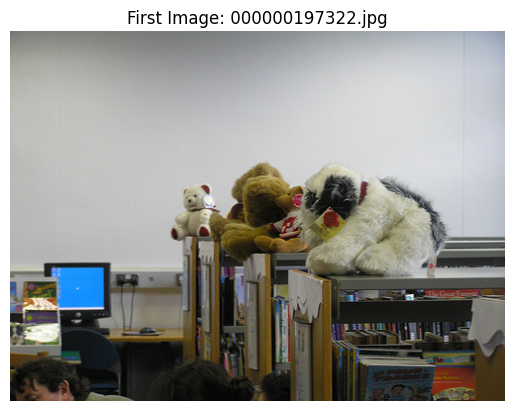

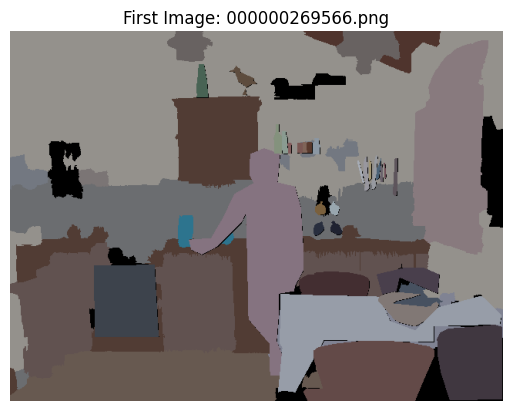

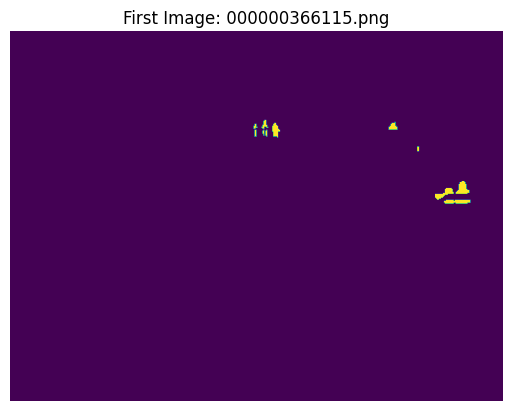

In [22]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def get_first_image_path(folder_path):
    """Get the full path of the first image in a folder."""
    c = 0
    valid_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')  # Define valid image file extensions
    for filename in os.listdir(folder_path):
        c = c + 1
        if filename.lower().endswith(valid_extensions) and c == 3:
            return os.path.join(folder_path, filename)
    return None  # Return None if no image is found

def plot_first_image(folder_path):
    """Plot the first image from a folder."""
    first_image_path = get_first_image_path(folder_path)
    if first_image_path:
        img = Image.open(first_image_path)  # Open the image using PIL
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(f"First Image: {os.path.basename(first_image_path)}")  # Show the image filename as title
        plt.show()
    else:
        print("No image found in the folder.")

# Example usage
folder_path = '/content/Master/train2017'  # Replace with your folder path # panoptic_train2017 # train2017 # Binary_Masks
plot_first_image(folder_path)

folder_path = '/content/Master/panoptic_train2017'  # Replace with your folder path # panoptic_train2017 # train2017 # Binary_Masks
plot_first_image(folder_path)

folder_path = '/content/Master/Binary_Masks'  # Replace with your folder path # panoptic_train2017 # train2017 # Binary_Masks
plot_first_image(folder_path)


In [26]:
import os
from pathlib import Path

def remove_unmatched_images(folder1, folder2):
    """Remove images from folder2 that do not have corresponding images in folder1."""

    # Get the base names (without extensions) of all .png files in folder1
    folder1_base_names = set(
        Path(f).stem for f in os.listdir(folder1) if f.lower().endswith('.png')
    )

    # Iterate over all .jpg files in folder2
    for file in os.listdir(folder2):
        if file.lower().endswith('.png'):
            file_base_name = Path(file).stem  # Get the base name without extension
            if file_base_name not in folder1_base_names:
                # Remove file if it does not exist in folder1
                file_path = os.path.join(folder2, file)
                os.remove(file_path)
                print(f"Removed: {file_path}")

# Example usage
folder1 = '/content/Master/Binary_Masks'  # Replace with the path to your first folder (PNG images)
folder2 = '/content/Master/panoptic_train2017'  # Replace with the path to your second folder (JPG images)

remove_unmatched_images(folder1, folder2)


Streaming output truncated to the last 5000 lines.
Removed: /content/Master/panoptic_train2017/000000065447.png
Removed: /content/Master/panoptic_train2017/000000176273.png
Removed: /content/Master/panoptic_train2017/000000456816.png
Removed: /content/Master/panoptic_train2017/000000527962.png
Removed: /content/Master/panoptic_train2017/000000490055.png
Removed: /content/Master/panoptic_train2017/000000317286.png
Removed: /content/Master/panoptic_train2017/000000286690.png
Removed: /content/Master/panoptic_train2017/000000097240.png
Removed: /content/Master/panoptic_train2017/000000336643.png
Removed: /content/Master/panoptic_train2017/000000580631.png
Removed: /content/Master/panoptic_train2017/000000559301.png
Removed: /content/Master/panoptic_train2017/000000523183.png
Removed: /content/Master/panoptic_train2017/000000437810.png
Removed: /content/Master/panoptic_train2017/000000070685.png
Removed: /content/Master/panoptic_train2017/000000142426.png
Removed: /content/Master/panoptic_

In [30]:
import os

def get_folder_size(folder_path):
    """Calculate the size of a folder in gigabytes."""
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            total_size += os.path.getsize(file_path)

    # Convert bytes to gigabytes
    size_in_gb = total_size / (1024 ** 3)
    return size_in_gb

# Example usage
folder_path = '/content/Master'  # Replace with the path to your folder
size_in_gb = get_folder_size(folder_path)
print(f"Folder size: {size_in_gb:.2f} GB")


Folder size: 10.94 GB


In [32]:
import shutil

def archive_folder(folder_path, archive_name):
    # Create a zip archive of the folder
    shutil.make_archive(archive_name, 'zip', folder_path)

# Set the path to the folder you want to archive and the desired archive name
folder_path = '/content/Master'
archive_name = 'COCOMS'  # The name of the resulting archive file (without extension)

archive_folder(folder_path, archive_name)


In [ ]:
# import requests

# def download_zip(url, save_path):
#     """Download a ZIP file from a URL and save it locally."""
#     response = requests.get(url, stream=True)
#     if response.status_code == 200:
#         with open(save_path, 'wb') as f:
#             f.write(response.content)
#         print(f"Downloaded file saved as '{save_path}'.")
#     else:
#         print(f"Failed to download file. Status code: {response.status_code}")

# # Example usage
# url = 'https://example.com/path/to/your/file.zip'  # Replace with the URL of the ZIP file
# save_path = 'path/to/save/your/file.zip'  # Replace with the desired local file path
# download_zip(url, save_path)


In [ ]:
# IMG_PATHS = os.path.sep.join([BASE_OUTPUT, "img_paths.txt"])
# BMASKS_PATHS = os.path.sep.join([BASE_OUTPUT, "bmasks_paths.txt"])

# print("[INFO] saving image paths...")
# f = open(IMG_PATHS, "w")
# f.write("\n".join(imagePaths))
# f.close()

# print("[INFO] saving binary masks paths...")
# f = open(BMASKS_PATHS, "w")
# f.write("\n".join(binaryMaskPaths))
# f.close()

## Train

In [4]:
# https://github.com/qubvel/segmentation_models.pytorch
# https://github.com/qubvel/segmentation_models.pytorch#architectures

RESNET_SIZE = 256
transf_size = RESNET_SIZE

# Initialize transformations - train
transforms_train = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])

# Initialize transformations - test (optional)
transforms_test = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])


# Define hyperparameters
INIT_LR = 0.0001
BATCH_SIZE = 16
NUM_EPOCHS = [10, 20, 50, 100, 150]
TEST_SPLIT = [0.2] # 0.3
VALID_SPLIT = 0.1 # 0.1

wb_name = "Mobilenet_Unet_MSCOCO_GreenScreen_small"
loaded_df = pd.read_csv(r'/content/Master/shuffled_df_small.csv')

dataset_type = 'cocoms'
channels = 3
model_type = 'mobilenetv2' # GCA, resnet, mobilenetv2, efficientnet, deeplab
# 73c482950d37419655b401f882c34c719ca587af

main.main_loop(loaded_df, TEST_PATHS, transforms_train, transforms_test, wb_name, INIT_LR, BATCH_SIZE, NUM_EPOCHS, TEST_SPLIT, VALID_SPLIT, PIN_MEMORY, model_type, channels, dataset_type, saved_model_path = None)




wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


images = 9000
binaryMaskPaths = 9000
[INFO] TEST_SPLIT = 0.2 ...
Splits, Datasets, and Dataloaders
[INFO] saving testing image paths...
[INFO] Total time taken to create the dataset and dataloader: 0.08s
trainSteps = 405, testSteps = 112, valSteps = 45


[INFO] Training the network for 10 epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Training...


  0%|          | 0/10 [29:07<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image, predicted binary mask, and new background image
original_image = cv2.imread('path_to_original_image.jpg')
predicted_mask = cv2.imread('path_to_predicted_mask.png', cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale
new_background = cv2.imread('path_to_new_background.jpg')

# Resize the new background to match the original image size
new_background = cv2.resize(new_background, (original_image.shape[1], original_image.shape[0]))

# Ensure the mask is binary (0 and 255 values)
_, binary_mask = cv2.threshold(predicted_mask, 128, 255, cv2.THRESH_BINARY)

# Invert the mask to get the background mask
inverse_mask = cv2.bitwise_not(binary_mask)

# Convert masks to 3 channels to match the image dimensions
binary_mask_3ch = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
inverse_mask_3ch = cv2.cvtColor(inverse_mask, cv2.COLOR_GRAY2BGR)

# Extract the foreground from the original image
foreground = cv2.bitwise_and(original_image, binary_mask_3ch)

# Extract the corresponding region from the new background
background = cv2.bitwise_and(new_background, inverse_mask_3ch)

# Combine the foreground with the new background
result_image = cv2.add(foreground, background)

# Convert images from BGR to RGB for correct color display with matplotlib
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Set up subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
ax[0].imshow(original_image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')  # Hide the axis

# Display the binary mask
ax[1].imshow(predicted_mask, cmap='gray')  # Display mask in grayscale
ax[1].set_title('Binary Mask')
ax[1].axis('off')

# Display the result image
ax[2].imshow(result_image_rgb)
ax[2].set_title('Result Image with New Background')
ax[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
